<a href="https://colab.research.google.com/github/OfficerChul/Deep_Learning_Study/blob/main/CIFAR100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
"""
* FILENAME : CIFAR100_CNN.ipynb
*
* DESCRIPTION : classify cifar100 dataset in 100 classes using Convolutional Neural Network (CNN)
*
* AUTHOR : Kyochul Jang
* EMAIL: jang128@purdue.edu
* START DATE : 26 July 2022
"""

'\n* FILENAME : CIFAR100_CNN.ipynb\n*\n* DESCRIPTION : classify cifar100 dataset in 100 classes using Convolutional Neural Network (CNN)\n*\n* AUTHOR : Kyochul Jang\n* EMAIL: jang128@purdue.edu\n* START DATE : 26 July 2022\n'

In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [58]:
device_list = tf.test.gpu_device_name()

In [59]:
print(device_list)

/device:GPU:0


In [60]:
# Import Datasets

In [61]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
x_train, x_test = x_train/255, x_test/255 # Normalize
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')
## One-Hot Encoding
y_test = pd.get_dummies(i for i in y_test.T[0])
y_train = pd.get_dummies(i for i in y_train.T[0])
print(y_test[:5])

$ x_train: (50000, 32, 32, 3)
$ y_train: (50000, 1)
$ x_test: (10000, 32, 32, 3)
$ y_test: (10000, 1)
   0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   97  98  99  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 100 columns]


In [62]:
## Convolution Layer
def build_model(layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size):
  model = Sequential()
  for ln in range(layer_num):
    ### Convolve
    model.add(Conv2D(filters=filter_size, kernel_size=3, padding='same', activation='relu', use_bias = True, input_shape=(32, 32, 3)))
    ### Maxpooling
    model.add(MaxPool2D(pool_size=(pool_size, pool_size), strides=strides, padding='same'))
  ## Fully Connected Layer
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(100, activation='softmax'))
  adam = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)

In [63]:
def plot_cnn(layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size, model):
  plt.figure(figsize=(12,4))
  nl = '\n'
  plt.subplot(1, 2, 1)
  plt.plot(model.history['loss'], label='loss')
  plt.plot(model.history['val_loss'], label='val_loss')
  
  plt.xlabel('Epochs')
  plt.grid()
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(model.history['accuracy'], label='accuracy')
  plt.plot(model.history['val_accuracy'], label='val_accuracy')

  # plt.suptitle(f'layer_num: {layer_num}{nl}learning rate: {learning_rate} {nl} epochs={epochs}{nl}batch_size={batch_size}{nl}strides=pool_sizes={pool_size}{nl}filter_size={filter_size}')
  plt.xlabel('Epochs')
  plt.grid()
  plt.legend()

  figure_title = f'layer_num: {layer_num}{nl}learning rate: {learning_rate} {nl} epochs={epochs}{nl}batch_size={batch_size}{nl}strides=pool_sizes={pool_size}{nl}filter_size={filter_size}'
  plt.title(figure_title, y=1.08)

  plt.show()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 3)         84        
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 32, 32, 3)        0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_32 (Dense)            (None, 256)               786688    
                                                                 
 dense_33 (Dense)            (None, 100)               25700     
                                                                 
Total params: 812,472
Trainable params: 812,472
Non-trainable params: 0
_______________________________________________

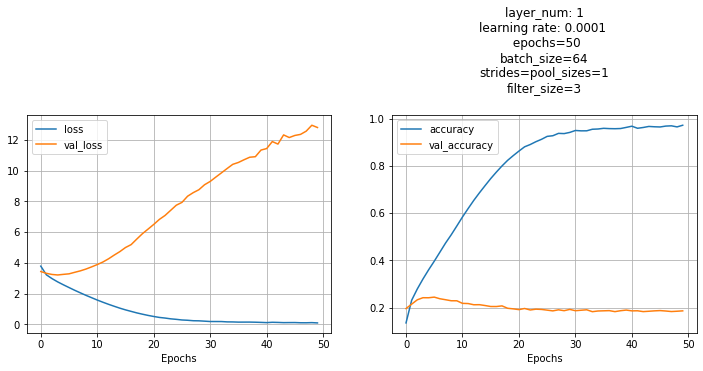

In [64]:
## Build Model1
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model1_hp = [1, 1e-4, 1, 1, 50, 64, 3]
model1 = build_model(*model1_hp)
plot_cnn(*model1_hp, model1)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 3)         84        
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 3)        0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 3072)              0         
                                                                 
 dense_34 (Dense)            (None, 256)               786688    
                                                                 
 dense_35 (Dense)            (None, 100)               25700     
                                                                 
Total params: 812,472
Trainable params: 812,472
Non-trainable params: 0
_______________________________________________

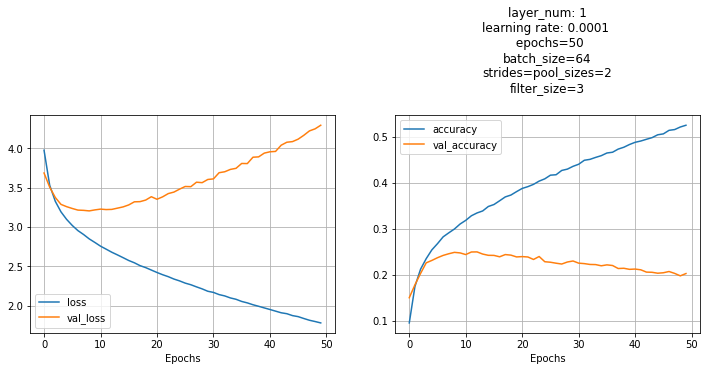

In [65]:
## Build Model2
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model2_hp = [1, 1e-4, 1, 2, 50, 64, 3]
model2 = build_model(*model2_hp)
plot_cnn(*model2_hp, model2)

In [66]:
# sigmoid
def build_model_sigmoid(layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size):
  model = Sequential()
  for ln in range(layer_num):
    ### Convolve
    model.add(Conv2D(filters=filter_size, kernel_size=3, padding='same', activation='relu', use_bias = True, input_shape=(32, 32, 3)))
    ### Maxpooling
    model.add(MaxPool2D(pool_size=(pool_size, pool_size), strides=strides, padding='same'))
  ## Fully Connected Layer
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(256, activation='sigmoid'))
  model.add(Dense(100, activation='softmax'))
  adam = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)

In [ ]:
## Build Model3 - sigmoid right before softmax
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size]
model2_hp_sigmoid = [1, 1e-4, 1, 1, 50, 64, 3]
model2_sigmoid = build_model_sigmoid(*model2_hp_sigmoid)
plot_cnn(*model2_hp_sigmoid, model2_sigmoid)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 3)         84        
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 32, 32, 3)        0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 256)               786688    
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dense_38 (Dense)            (None, 100)               25700     
                                                     

In [ ]:
## Build Model4
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model4_hp = [3, 1e-4, 1, 1, 50, 64, 3]
model4 = build_model(*model4_hp)
plot_cnn(*model4_hp, model4)

In [ ]:
## Build Model5
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model5_hp = [3, 1e-4, 1, 1, 50, 200, 3]
model5 = build_model(*model5_hp)
plot_cnn(*model5_hp, model5)

In [ ]:
## Build Model6
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model6_hp = [3, 1e-4, 3, 3, 50, 200, 32]
model6 = build_model(*model6_hp)
plot_cnn(*model6_hp, model6)

In [ ]:
## Build Model7
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model7_hp = [1, 1e-4, 3, 3, 50, 200, 32]
model7 = build_model(*model7_hp)
plot_cnn(*model7_hp, model7)

In [ ]:
## Build Model8
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model8_hp = [3, 1e-4, 3, 3, 25, 300, 32]
model8 = build_model(*model8_hp)
plot_cnn(*model8_hp, model8)

In [ ]:
## Build Model9
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model9_hp = [3, 1e-4, 3, 3, 25, 64, 32]
model9 = build_model(*model9_hp)
plot_cnn(*model9_hp, model9)

In [ ]:
## Fix Overfitting
## Convolution Layer
def build_model_fixed(layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size):
  model = Sequential()
  ### Convolve
  model.add(Conv2D(filters=filter_size, kernel_size=3, padding='same', activation='relu', use_bias = True, input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  ### Maxpooling
  model.add(MaxPool2D(pool_size=(pool_size, pool_size), strides=strides, padding='same'))
  ### Convolve
  model.add(Conv2D(filters=filter_size, kernel_size=3, padding='same', activation='relu', use_bias = True, input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  ### Maxpooling
  model.add(MaxPool2D(pool_size=(pool_size, pool_size), strides=strides, padding='same'))
  model.add(Dropout(0.2))
  ### Convolve
  model.add(Conv2D(filters=filter_size, kernel_size=3, padding='same', activation='relu', use_bias = True, input_shape=(32, 32, 3)))
  ### Maxpooling
  model.add(MaxPool2D(pool_size=(pool_size, pool_size), strides=strides, padding='same'))
  ## Fully Connected Layer
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='softmax'))
  adam = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)

In [ ]:
## Build Model10
# model_hp = [layer_num, learning_rate, strides, pool_size, epochs, batch_size, filter_size]
model10_hp = [3, 1e-4, 3, 3, 25, 64, 32]
model10 = build_model_fixed(*model10_hp)
plot_cnn(*model10_hp, model10)